# RNN 기법을 사용

## RNN 이란?

1. 순환 신경망(Recurrent Neural Network, RNN)

RNN(Recurrent Neural Network)은 시퀀스(Sequence) 모델입니다. 입력과 출력을 시퀀스 단위로 처리하는 모델입니다. 번역기를 생각해보면 입력은 번역하고자 하는 문장. 즉, 단어 시퀀스입니다. 출력에 해당되는 번역된 문장 또한 단어 시퀀스입니다. 이러한 시퀀스들을 처리하기 위해 고안된 모델들을 시퀀스 모델이라고 합니다. 그 중에서도 RNN은 딥 러닝에 있어 가장 기본적인 시퀀스 모델입니다.LSTM이나 GRU 또한 근본적으로 RNN에 속합니다.



RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖고있습니다.



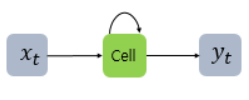

In [20]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211130_154949_1.png")

이를 그림으로 표현하면 위와 같습니다. x 는 입력층의 입력 벡터, y 는 출력층의 출력 벡터입니다. 
RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드를 셀(cell)이라고 합니다. 이 셀은 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하므로 이를 메모리 셀 또는 RNN 셀이라고 표현합니다.



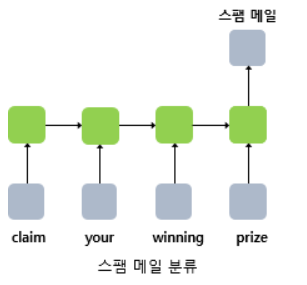

In [21]:
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211130_155233_1.png")

단어 시퀀스에 대해서 하나의 출력(many-to-one)을 하는 모델은 입력 문서가 긍정적인지 부정적인지를 판별하는 감성 분류(sentiment classification), 또는 메일이 정상 메일인지 스팸 메일인지 판별하는 스팸 메일 분류(spam detection)에 사용할 수 있습니다. 위 그림은 RNN으로 스팸 메일을 분류할 때의 아키텍처를 보여줍니다.

- 출처 : [https://wikidocs.net/22886](https://wikidocs.net/22886)

# Keras를 사용한 반복적 인 신경망 (RNN)

RNN (Recurrent Neural Network)은 시계열 또는 자연어와 같은 시퀀스 데이터를 모델링하는 데 강력한 신경망 클래스입니다.

Keras RNN API는 다음에 중점을두고 설계되었습니다.

- 사용 편리성: 내장 keras.layers.RNN, keras.layers.LSTM, keras.layers.GRU 레이어를 사용하여 어려운 구성 선택 없이도 반복 모델을 빠르게 구축할 수 있습니다.


- 사용자 정의 용이성 : 사용자 정의 동작으로 자체 RNN 셀 계층 ( for 루프의 내부 부분)을 정의하고 일반 keras.layers.RNN 계층 ( for 루프 자체)과 함께 사용할 수 있습니다. 이를 통해 최소한의 코드로 다양한 연구 아이디어를 유연한 방식으로 신속하게 프로토 타이핑 할 수 있습니다.

- 출처 : [https://www.tensorflow.org/guide/keras/rnn?hl=ko](https://www.tensorflow.org/guide/keras/rnn?hl=ko)

# 1) Data Preprocessing

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
# 문장을 시퀀스 자료형으로 바꾸기 위한 라이브러리
from tensorflow.keras.preprocessing.sequence import pad_sequences
# pad_sequences 이란? - https://seongjae-yoo.github.io/SpamDetectionwithCNN
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [3]:
df = pd.read_csv('./data/spam2.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# drop garbage columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# rename columns
df.columns = ['labels', 'data']

In [8]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# create binary labels (0 and 1)
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1}) # create new column as 'b_labels'
y = df['b_labels'].values

In [10]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(df['data'], y, test_size=0.33)

In [11]:
# Convert sentences to sequences
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [12]:
# Check word index mapping (to check the number of words in vocabulary)
word2idx = tokenizer.word_index
V = len(word2idx)
print('Total number of unique tokens are: %s' % V)

Total number of unique tokens are: 7267


In [13]:
# pad sequences (to get  N x T matrix)
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# N: number of samples and T: Number of time steps

Shape of data train tensor: (3733, 189)


In [14]:
# set the value of T to get sequence length
T = data_train.shape[1]

In [15]:
print(T)

189


In [16]:
# pad the test set
data_test = pad_sequences(sequences_test, maxlen=T)
# maxlen = T, to truncate longer sentences in test set
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


# 2) Building the Model

In [17]:
# 워드 임베딩을 해주기 위해 단어 벡터화 사이즈 크기 설정 하기
# Choose embedding dimensionality
D = 20  # this is a hyper parameter, we can choose any word vector size that we want

# Hidden state vectorsize (dimensionality)
M = 15

# Input layer
i = Input(shape=(T,))  # input layer takes in sequences of integers, so shape is T

# Embedding layer
x = Embedding(V + 1, D)(i) # This takes in sequences of integers and returns sequences of word vectors
# This will be an N * T * D array
# we want size of embedding to (V + 1) x D, because first word index starts from 1 and not 0

# LSTM layer - 전통적인 RNN의 이러한 단점을 보완한 RNN의 일종을 장단기 메모리(Long Short-Term Memory)라고 하며, 줄여서 LSTM이라고 합니다. LSTM은 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정합니다. 요약하면 LSTM은 은닉 상태(hidden state)를 계산하는 식이 전통적인 RNN보다 조금 더 복잡해졌으며 셀 상태(cell state)라는 값을 추가하였습니다. 위의 그림에서는 t시점의 셀 상태를 로 표현하고 있습니다. LSTM은 RNN과 비교하여 긴 시퀀스의 입력을 처리하는데 탁월한 성능을 보입니다
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x) #여러 개의 벡터 정보 중 가장 큰 벡터를 골라서 반환합니다.

# Dense layer에 sigmoid: 로지스틱 함수 적용
x = Dense(1, activation='sigmoid')(x)
# it is an binary classification problem, so we are using activation function ='sigmoid'

model = Model(i, x)


In [18]:
# Compile the model / 모델학습과정 수행시킴
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# optimizer='adam' : Adam 알고리즘을 구현하는 Optimizer
#                    : Instantiate an optimizer.
 
# optimizers - usage with compile() and fit()
# 참고사이트 - https://keras.io/api/optimizers/

#  loss : 최적화 과정에서 최소화될 손실함수를 설정하는 것으로, MSE(평균 제곱 오차)와 binary_crossentropy가 자주 사용된다

# MSE - MSE가 크다는 것은 데이터와 평균 사이에 차이가 크다는 것 
#     - MSE가 작다는 것은 데이터와 평균 사이의 차이가 작다는 것 

# - 평균 제곱 오차 구하는 방법 - 
# 1. 평균을 구한다. 
# 2. 각 데이터에서 평균을 뺀 값에 제곱을 한다.
# 3. 2번에서 구한 값을 모두 더한다. 
# 4. 3번에서 구한 값에 총 데이터 숫자만큼 나눈다. 

#binary_crossentropy - 손실 함수의 종류로 Binary classification 즉 클래스가 두개 인 이진 분류 문제에서 사용
#                    - 시그모이드 (sigmoid) 함수 (마지막 레이어 활성화 함수)

#metrics - 평가 기준을 말한다. 평가 기준에는 모델의 학습에는 영향을 미치지 않지만, 학습 과정 중에 제대로 학습되고 있는 지 살펴볼 수 있다.
#        - 일반적으로 평가 기준을 accuracy으로 설정한다.
# 참고사이트 - https://tykimos.github.io/2017/09/24/Custom_Metric/

In [19]:
# Train the model
# epochs = 10이라면 전체 데이터를 10번 사용해서 학습을 거치는 것이다.
# ▶ 우리는 모델을 만들 때 적절한 epoch 값을 설정해야만 underfitting과 overfitting을 방지할 수 있습니다.
# epoch 값이 너무 작다면 underfitting이 너무 크다면 overfitting이 발생할 확률이 높은 것이죠.

r = model.fit(x=data_train, y=y_train, epochs=10, validation_data=(data_test, y_test))

Epoch 1/10
117/117 [==============================] - 11s 71ms/step - loss: 0.5690 - accuracy: 0.8046 - val_loss: 0.3826 - val_accuracy: 0.8706
Epoch 2/10
117/117 [==============================] - 5s 47ms/step - loss: 0.3957 - accuracy: 0.8561 - val_loss: 0.3277 - val_accuracy: 0.8706
Epoch 3/10
117/117 [==============================] - 5s 43ms/step - loss: 0.3187 - accuracy: 0.8705 - val_loss: 0.2955 - val_accuracy: 0.8706
Epoch 4/10
117/117 [==============================] - 5s 44ms/step - loss: 0.3010 - accuracy: 0.8586 - val_loss: 0.2525 - val_accuracy: 0.8706
Epoch 5/10
117/117 [==============================] - 5s 46ms/step - loss: 0.2581 - accuracy: 0.8520 - val_loss: 0.2096 - val_accuracy: 0.8706
Epoch 6/10
117/117 [==============================] - 6s 48ms/step - loss: 0.1941 - accuracy: 0.8720 - val_loss: 0.1803 - val_accuracy: 0.9375
Epoch 7/10
117/117 [==============================] - 5s 41ms/step - loss: 0.1642 - accuracy: 0.9369 - val_loss: 0.1574 - val_accuracy: 0.978

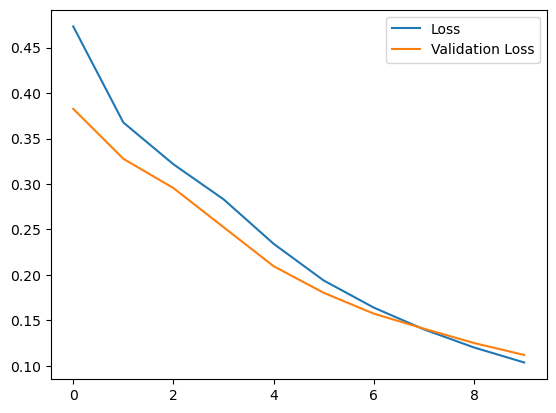

In [24]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

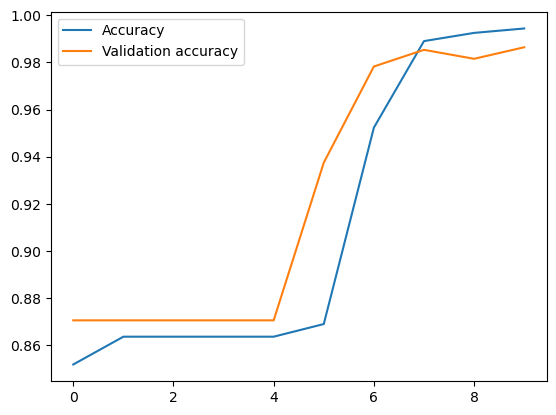

In [25]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()